In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
x\cdot y = \sum_i x_iy_i = ||x|| ||y|| \cos(\theta)
$$

$$
x(t)\cdot y(t) = \int x(t)y(t)dt
$$

$$
\sin(w_ct+\phi)\quad \phi=90 => \cos(w_ct)
$$

In [4]:
# 00: 45, 01 135, 10: -45, 11: -135

class QPSK:
    def __init__(self, codBin, fc, fs):
      self.codBin, self.fc, self.fs = codBin, fc, fs
      self.matrizFases = np.radians(np.array([[45,135],[-45,-135]]))
      self.t = np.linspace(0,1/self.fc,int(self.fs/self.fc))

    def generarSenal(self):
      y = np.sin(2*np.pi*self.fc*self.t+self.matrizFases[self.codBin[0],self.codBin[1]])
      return self.t,y

    def sepSenal(self,y):
      punto = np.sum(y*np.sin(2*np.pi*self.fc*self.t))
      codBin = [1,1]
      if punto>0:
        codBin[1] = 0
      if y[0]>0:
        codBin[0] = 0
      return codBin

q1 = QPSK([1,1],10,1000)
t,y = q1.generarSenal()

[0, 0]
[0, 1]
[1, 0]
[1, 1]


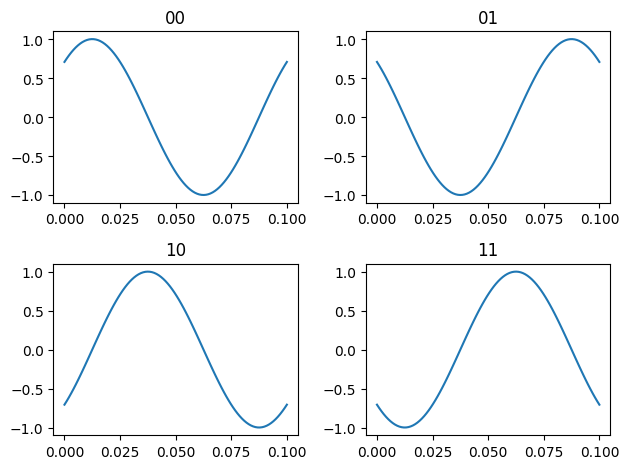

In [5]:
fig, ax = plt.subplots(2, 2)
for i in range(2):
  for j in range(2):
    q1 = QPSK([i,j],10,1000)
    t,y = q1.generarSenal()
    print(q1.sepSenal(y))
    ax[i,j].plot(t,y)
    ax[i,j].set_title(str(i)+str(j))
fig.tight_layout()

# Ejercicio 3

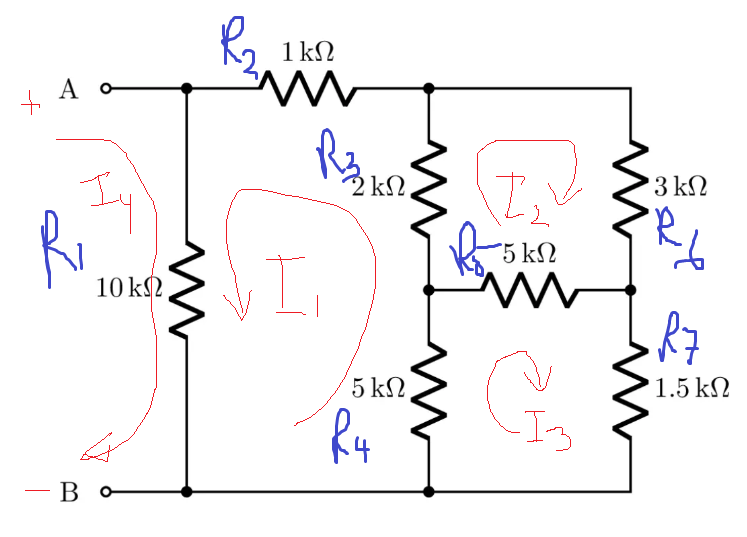

In [6]:
V = 100
R  = np.array([10*1e3, 1e3, 2e3,5e3,5e3,3e3,1.5e3])
# I1*(R1+R2+R3+R4) + I2*R3 + I3*R4 + I4*R1 = 0
# I2*(R3+R5+R6) - I3*R5 + I1*R3 = 0
# I3*(R4+R5+R7) + I1*R4 - I2*R5 = 0
# (I4+I1)*R1 = 100
A = np.array([[np.sum(R[:4]), R[2], R[3], R[0]],
              [R[2], np.sum(R[[2,4,5]]), -R[4], 0],
              [R[3], -R[4], np.sum(R[[3,4,6]]), 0],
              [R[0],0,0,R[0]]] )
b = np.array([[0],[0],[0],[100]])
I = np.linalg.solve(A,b)

In [7]:
I

array([[-0.02777778],
       [ 0.01481481],
       [ 0.01851852],
       [ 0.03777778]])

# Ejercicio 4

0V -> 00 -> 0 <br>
10V -> 11 -> 3 <br>
01 -> 10/3  <br>
10 -> 2/3*10

In [8]:
deltaV = 10/3
print(deltaV*1, deltaV*2, deltaV*3)

3.3333333333333335 6.666666666666667 10.0


In [9]:
class analogDig:
  def __init__(self,Vmin,Vmax,N,Ts):
    self.Vmin = Vmin
    self.Vmax = Vmax
    self.N = N
    self.Ts = Ts
    self.div = 2**N-1
    self.deltaV = (Vmax-Vmin)/self.div
    self.voltajes = np.arange(Vmin,Vmax+self.deltaV,self.deltaV)

  def convertirVol(self, analogInput):
    vecBol = self.votajes > analogInput
    return np.where(daq.voltajes>daq.voltajes[1])[0][0]-1


In [10]:
daq = analogDig(-10,10,2,1)

In [11]:
daq.voltajes

array([-10.        ,  -3.33333333,   3.33333333,  10.        ])

In [12]:
daq.voltajes>daq.voltajes[1]

array([False, False,  True,  True])

In [13]:
np.where(daq.voltajes>daq.voltajes[1])[0][0]-1

1